> ###  **Project Deadlines**
> - **December 2:** Presentations  
> - **December 8 (11:00 PM):** Final report submission  
>
> ---
>
> ###  **Brainstorming & Project Development**
> Dataset source: [UCI Heart Disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)
>
> ---
>
> ###  **Dataset Information**
> - The database contains **76 attmributes**, but all published experiments use a **subset of 14**.  
> - The **Cleveland database** is the one most commonly used in ML research.  
> - The **goal** field indicates **heart disease presence**:
>   - `0` = no disease  
>   - `1, 2, 3, 4` = disease present  
> - Most studies simplify this into **binary classification**:  
>   - 0 → No Heart Disease  
>   - 1 → Heart Disease Present  
> - Personally identifiable information (like names/SSNs) has been **removed** and replaced with dummy values.  
> - The **"processed" file** corresponds to the **Cleveland dataset**, which we’ll use.  
>
> ---
>
> > ###  **Data Cleaning Plan**
>
> #### 1 Replace or Drop Missing Values
> - In this dataset, missing values are represented by `?`.  
> - We’ll replace them with `NaN` and decide whether to drop or impute them later.  
>   ```python
>   df.replace('?', pd.NA, inplace=True)
>   df = df.dropna()
>   ```
>   *Ensures all numeric data is valid before processing.*
>
> ---
>
> #### 2 Convert All Columns to Correct Data Types
> - After replacing `?`, columns may still be stored as `object`.  
>   ```python
>   df = df.apply(pd.to_numeric)
>   ```
>   *Allows models and numerical operations to work correctly.*
>
> ---
>
> #### 3 Simplify the Target Variable
> - The `target` column values range from 0–4.  
> - Convert to a **binary classification**:  
>   ```python
>   df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
>   ```
>   *Groups all levels of heart disease into a single “disease present” category.*
>
> ---
>
> #### 4 Check for Duplicate Records
> - Remove duplicates to prevent bias.  
>   ```python
>   df = df.drop_duplicates()
>   ```
>
> ---
>
> #### 5 Detect Outliers or Unrealistic Values
> - Use summary stats or boxplots to spot extreme values (e.g., cholesterol = 0).  
>   ```python
>   df.describe()
>   ```
>    *Outliers may affect model accuracy — decide to clip or scale later.*
>
> ---
>
> #### 6 Feature Scaling / Normalization
> - Standardize features so they’re on a similar scale.  
>   ```python
>   from sklearn.preprocessing import StandardScaler
>   scaler = StandardScaler()
>   X_scaled = scaler.fit_transform(df.drop('target', axis=1))
>   ```
>   *Prevents large-scale features (like cholesterol) from dominating small ones.*
>
> ---
>
> #### 7 Encode Categorical Features
> - Columns like `cp`, `thal`, and `slope` represent categories, not numeric values.  
>   ```python
>   df = pd.get_dummies(df, columns=['cp', 'thal', 'slope'], drop_first=True)
>   ```
>   *One-hot encoding helps algorithms correctly interpret these features.*
>
> ---
>
> #### 8 Final Sanity Checks
> ```python
> df.info()
> df.isnull().sum()
> df.head()
> ```
> *Confirm:*
> - No missing values  
> - Correct data types  
> - Logical column outputs  
>
> ---
>
> **After this step:**  
> The dataset will be fully cleaned, numeric, and ready for **EDA** (Exploratory Data Analysis) and **Model Building**.

>
> **Summary**
> We’ll use the **Cleveland Heart Disease dataset**, clean the missing values, add headers, and then proceed with exploratory analysis and prediction modeling.



In [ ]:
#Import required libraries
import pandas as pd
import numpy as np

#defining column names
cols = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'target'
]

df = pd.read_csv("data/processed.cleveland.data", names=cols, na_values='?')

# Preview first few rows
print("Dataset loaded successfully!")
print(df.shape)
df.head()


Dataset loaded successfully!
(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [2]:
# cleaning the data

print("missing values before cleaning:")
print(df.isnull().sum())


#dropping rows with missing values for simplicity
df = df.dropna()

#converting all columns to numeric data types
df = df.apply(pd.to_numeric)

print("\ndata types after conversion:")
print(df.dtypes)


missing values before cleaning:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

data types after conversion:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object


In [3]:
# simplifying target column (binary classification)
# original: 0 = no disease, 1-4 = presence of disease
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print("\nvalue counts for target column:")
print(df['target'].value_counts())


value counts for target column:
target
0    160
1    137
Name: count, dtype: int64


In [4]:
# removing dups and basic sanity checks

df = df.drop_duplicates()

#verify
print("\nafter removing duplicates:")
print(df.shape)

#quick summary
print("\nsummary statistics:")
print(df.describe())


after removing duplicates:
(297, 14)

summary statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.05

In [5]:
#final check - were getting ready for EDA or modeling

print("\nfinal dataset info:")
df.info

print("\nmissing values after cleaning:")
print(df.isnull().sum())

print("\ndata cleaning is complete. ready for eda or modeling")


final dataset info:

missing values after cleaning:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

data cleaning is complete. ready for eda or modeling


In [ ]:
# saving cleaned data
df.to_csv("cleaned_processed.cleveland.csv", index=False)

> ###  **Exploratory Data Analysis (EDA) Plan**
>
> After cleaning the data, the next step is to explore and understand the relationships between variables.  
> The main goal is to identify which features might influence heart disease and to visualize overall data patterns.
>
> ---
>
> #### 1 Understand Basic Statistics
> - Use `df.describe()` to get a summary of all numeric columns.
> - Check central tendencies (mean, median) and dispersion (std, min, max).
> - Look for unusual ranges or outliers (e.g., cholesterol or age values).
>
> ---
>
> #### 2 Visualize Feature Distributions
> - Use histograms to show the spread of key continuous variables:  
>   - Age (`age`)  
>   - Resting blood pressure (`trestbps`)  
>   - Cholesterol (`chol`)  
>   - Max heart rate achieved (`thalach`)  
>   - ST depression (`oldpeak`)
>
> - Example:
>   ```python
>   import matplotlib.pyplot as plt
>   df.hist(figsize=(12,8), bins=20, color='skyblue')
>   plt.suptitle('Feature Distributions', fontsize=16)
>   plt.show()
>   ```
> - Helps detect skewness, outliers, and the general data shape.
>
> ---
>
> #### 3 Analyze Correlations Between Features
> - Compute correlation matrix:  
>   ```python
>   corr = df.corr()
>   ```
> - Plot with a heatmap:
>   ```python
>   import seaborn as sns
>   plt.figure(figsize=(10,8))
>   sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
>   plt.title('Correlation Heatmap')
>   plt.show()
>   ```
> - Pay special attention to how features like `thalach`, `oldpeak`, and `cp` relate to `target`.
>
> ---
>
> #### 4 Compare Groups (Heart Disease vs No Disease)
> - Split data by `target` (0 = no disease, 1 = disease) and compare averages:
>   ```python
>   df.groupby('target').mean()
>   ```
> - Use boxplots to visualize differences:
>   ```python
>   sns.boxplot(x='target', y='age', data=df)
>   sns.boxplot(x='target', y='chol', data=df)
>   ```
> - This helps reveal which variables differ significantly between patients with and without heart disease.
>
> ---
>
> #### 5 Visualize Categorical Features
> - Count plots for categorical columns like:
>   - Chest pain type (`cp`)
>   - Resting ECG results (`restecg`)
>   - Slope of ST segment (`slope`)
> - Example:
>   ```python
>   sns.countplot(x='cp', hue='target', data=df)
>   plt.title('Chest Pain Type vs Heart Disease')
>   ```
> - Highlights which categorical patterns may indicate higher disease risk.
>
> ---
>
> #### 6 Check Relationships Between Continuous Variables
> - Scatter plots can show linear or non-linear patterns:
>   ```python
>   sns.scatterplot(x='age', y='thalach', hue='target', data=df)
>   plt.title('Max Heart Rate vs Age (Colored by Disease)')
>   ```
> - Look for clusters or separations between the two `target` groups.
>
> ---
>
> ####  **Goal**
> By the end of EDA:
> - Understand which features are most correlated with heart disease.  
> - Identify outliers or anomalies that may affect model training.  
> - Decide which features to keep, scale, or transform before modeling.


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


> ###  **Summary Statistics Overview**
>
> Using `df.describe()`, we can observe the main statistical characteristics of each feature in the dataset.
>
> #### 1 Age
> - **Range:** 29–77 years old  
> - **Average:** ~54.5 years  
> - Indicates that most patients in the dataset are middle-aged to older adults.
>
> #### 2 Sex
> - Encoded as `0 = female`, `1 = male`  
> - **Mean:** 0.68 → roughly **68% of patients are male**.
>
> #### 3 Chest Pain Type (`cp`)
> - Values range from 1–4 (different chest pain categories).  
> - **Mean ~3.16**, indicating most patients report “asymptomatic” or “non-anginal” pain types.
>
> #### 4 Resting Blood Pressure (`trestbps`)
> - **Range:** 94–200 mm Hg  
> - **Average:** 131.7 mm Hg — within the upper normal range but includes hypertensive cases.
>
> #### 5 Cholesterol (`chol`)
> - **Range:** 126–564 mg/dl  
> - **Mean:** ~247 mg/dl — slightly high; many patients show elevated cholesterol.
>
> #### 6 Fasting Blood Sugar (`fbs`)
> - Binary (1 = >120 mg/dl).  
> - **Mean:** 0.145 → ~14.5% have high fasting blood sugar.
>
> #### 7 Resting ECG Results (`restecg`)
> - **Range:** 0–2  
> - **Mean:** ~1.0, suggesting normal ECG in most cases.
>
> #### 8 Max Heart Rate Achieved (`thalach`)
> - **Range:** 71–202 bpm  
> - **Mean:** ~150 bpm — higher values generally indicate healthier cardiovascular response.
>
> #### 9 Exercise-Induced Angina (`exang`)
> - Binary (1 = yes).  
> - **Mean:** 0.33 → about **one-third** experience angina during exercise.
>
> #### 10 ST Depression (`oldpeak`)
> - **Range:** 0.0–6.2  
> - **Mean:** ~1.06 → reflects moderate ST segment changes (linked to ischemia severity).
>
> #### 11 Slope of Peak Exercise ST Segment (`slope`)
> - **Range:** 1–3  
> - **Mean:** 1.6 → most patients have an “upsloping” or “flat” ST segment response.
>
> #### 12 Number of Major Vessels Colored by Fluoroscopy (`ca`)
> - **Range:** 0–3  
> - **Mean:** 0.68 → most patients have few or no major vessels with blockage.
>
> #### 13 Thalassemia (`thal`)
> - **Values:** 3, 6, 7 represent normal, fixed defect, reversible defect.  
> - **Mean:** 4.73 — distribution leans toward normal and fixed defects.
>
> #### 14 Target (Heart Disease)
> - **0 = No Disease**, **1 = Disease Present**  
> - **Mean:** 0.46 → roughly **46% of patients** have heart disease.
>
> ---
>
> ** Interpretation Summary**
> - The dataset is well-balanced between patients with and without heart disease.  
> - Most are middle-aged men with moderately elevated cholesterol and blood pressure.  
> - Features like `thalach`, `oldpeak`, `cp`, and `ca` show strong variation — likely key predictors in modeling.


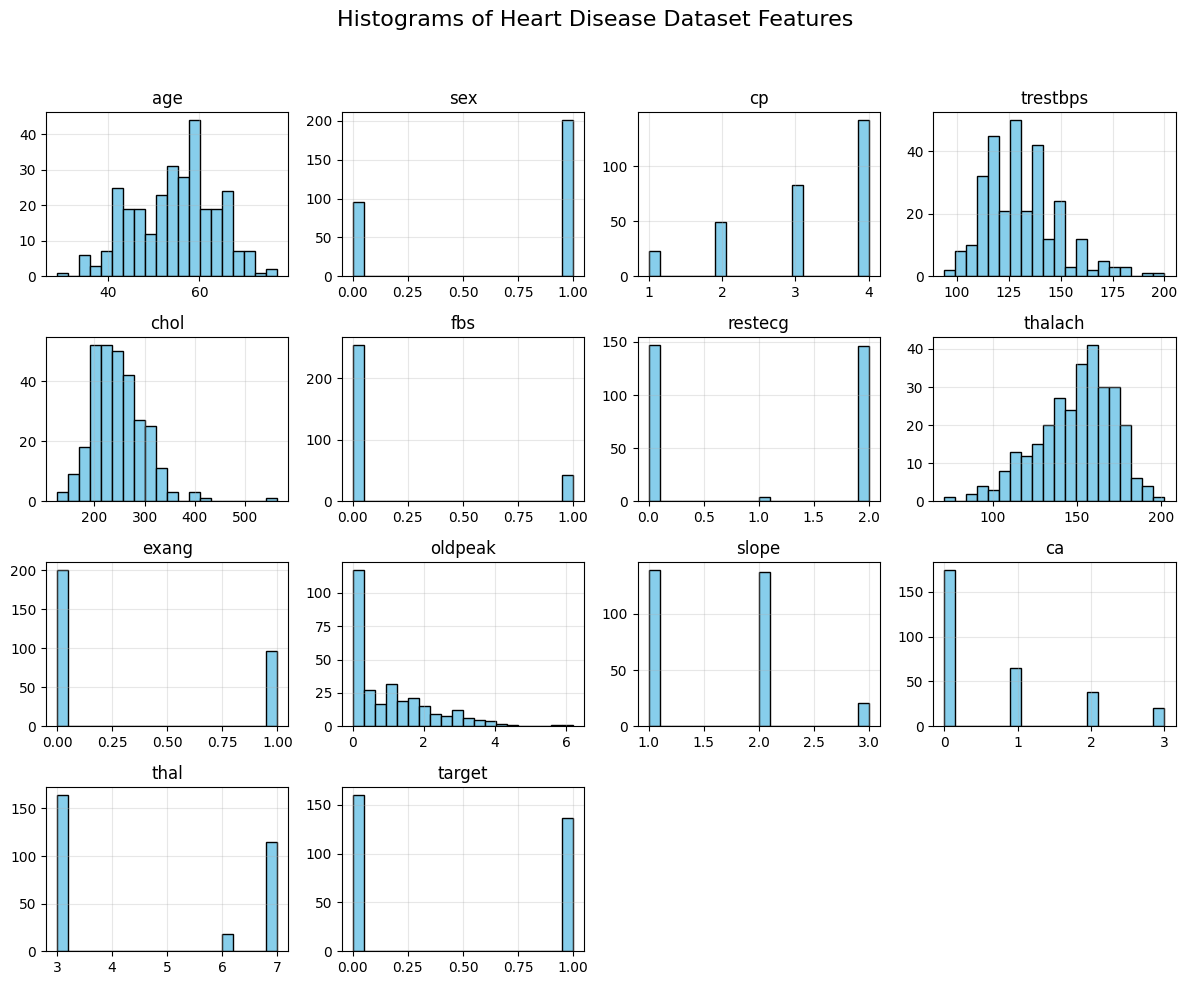

In [7]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Heart Disease Dataset Features', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
for ax in plt.gcf().axes:
    ax.grid(alpha=0.3)

plt.show()


> ### 📊 **Feature Distribution Analysis (Histograms)**
>
> The histograms above visualize the distribution of all 14 features in the dataset.
> This helps us identify skewed data, outliers, and potential normalization needs before modeling.
>
> ####  Age
> - Roughly normal distribution centered around **50–60 years old**.  
> - Indicates most patients are middle-aged or older, consistent with typical heart disease demographics.
>
> ####  Sex
> - Binary distribution with more values at `1` → **majority male (≈68%)**.
>
> ####  Chest Pain Type (`cp`)
> - Four distinct categories with peaks at 3 and 4 → most patients report **asymptomatic** or **non-anginal** pain.
>
> ####  Resting Blood Pressure (`trestbps`)
> - Slight right skew, centered around **120–140 mmHg**.  
> - A few outliers near 180–200 indicate potential hypertension cases.
>
> ####  Cholesterol (`chol`)
> - Strong right skew; most values fall between **200–300 mg/dL** but extend up to **564 mg/dL**, showing outliers.
>
> ####  Fasting Blood Sugar (`fbs`)
> - Binary distribution with most values at `0` → **few patients** have fasting blood sugar > 120 mg/dL.
>
> ####  Resting ECG Results (`restecg`)
> - Categorical (0–2), with the majority around **0 and 1**, meaning mostly normal or slight abnormalities.
>
> ####  Max Heart Rate Achieved (`thalach`)
> - Bell-shaped distribution centered near **150 bpm**.  
> - Patients achieving higher max HR generally show healthier cardiac response.
>
> ####  Exercise-Induced Angina (`exang`)
> - Binary: majority `0` → most patients **did not experience angina** during exercise.
>
> ####  ST Depression (`oldpeak`)
> - Right-skewed distribution with many near `0.0–1.0`.  
> - Outliers above 4 may indicate **severe ischemic changes**.
>
> ####  Slope of Peak Exercise ST Segment (`slope`)
> - Discrete variable (1–3) with most values around 1–2 → **flat or upsloping responses** are common.
>
> ####  Number of Major Vessels (`ca`)
> - Most patients have `0` or `1` vessels colored, implying **few severe blockages**.
>
> ####  Thalassemia (`thal`)
> - Clustered at **3, 6, and 7**, reflecting **normal**, **fixed defect**, and **reversible defect** categories.
>
> ####  Target (Heart Disease)
> - Binary distribution that is **fairly balanced** (160 no disease vs. 137 disease).  
> - Confirms the dataset is suitable for **binary classification**.
>
> ---
>
> ** Insights:**
> - Most features are numerical and continuous, with a few binary or categorical ones (`sex`, `fbs`, `exang`, `cp`, etc.).  
> - Several features (`chol`, `oldpeak`) are skewed, so **scaling or normalization** may help later models.  
> - Clear separation in `target` values shows a balanced dataset, ideal for predictive modeling.


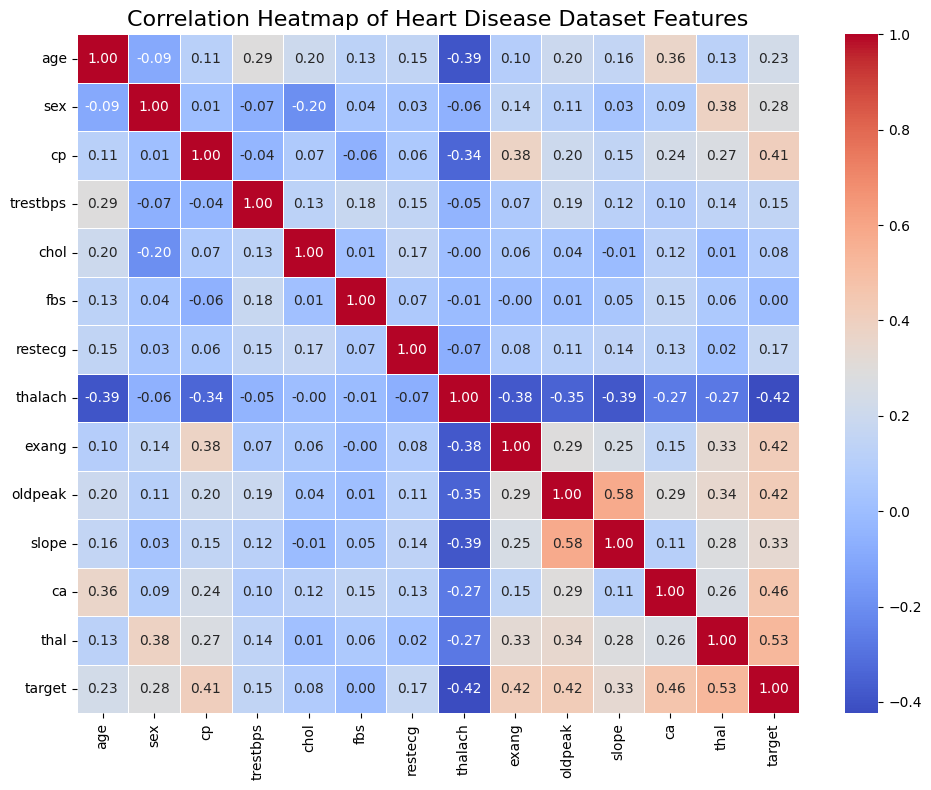

In [8]:
corr = df.corr()
corr

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Heart Disease Dataset Features', fontsize=16)
plt.tight_layout()
plt.show()

> ###  **Correlation Heatmap Interpretation**
>
> The heatmap above visualizes the relationships between all features in the Heart Disease dataset.  
> Red cells indicate **positive correlations**, while blue cells indicate **negative correlations**.  
> The intensity of color shows how strong the relationship is.
>
> ---
>
> ####  **Key Insights Related to Heart Disease (`target`):**
> - **`thal` (0.53)** → Strongest positive correlation. Certain thalassemia defects are strongly associated with heart disease.  
> - **`ca` (0.46)** → More major vessels colored by fluoroscopy = higher heart disease likelihood.  
> - **`oldpeak` (0.42)** → Greater ST depression indicates more severe cardiac abnormality.  
> - **`exang` (0.42)** → Exercise-induced angina positively linked to disease.  
> - **`cp` (0.41)** → Chest pain type also correlates with disease presence (especially asymptomatic pain types).  
> - **`thalach` (-0.42)** → Negative correlation, higher maximum heart rate achieved usually means healthier heart function.
>
> ---
>
> ####  **Relationships Between Other Variables**
> - **`oldpeak` ↔ `slope` (0.58)** — ST segment slope and depression are closely related indicators of ischemia.  
> - **`age` ↔ `trestbps` (0.29)** — Older patients tend to have higher resting blood pressure.  
> - **`exang` ↔ `thalach` (-0.38)** — Patients with exercise-induced angina tend to achieve lower max heart rates.  
> - **`cp` ↔ `thalach` (-0.34)** — Chest pain types also influence exercise performance.  
>
> ---
>
> ####  **Interpretation Summary**
> - Features like **`thal`**, **`ca`**, **`oldpeak`**, **`exang`**, and **`thalach`** show the strongest associations with heart disease.  
> - Positive values indicate **higher risk factors**, while negative values indicate **protective factors**.  
> - There’s **no severe multicollinearity**, as most inter-feature correlations are below 0.6, meaning these features can be safely used together in predictive models.
>
> ---
>
>  **Conclusion:**  
> This analysis highlights which features are most influential for predicting heart disease.  
> These correlations will guide the next step — **feature selection and model training**.


In [9]:
df.groupby('target').mean()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,52.643750,0.556250,2.793750,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,1.412500,0.275000,3.787500
1,56.759124,0.817518,3.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,1.824818,1.145985,5.832117


/var/folders/nm/8yyj86bj1c13_2fs_n9dql7w0000gn/T/ipykernel_9164/3741423750.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=df, palette='Set2')
/var/folders/nm/8yyj86bj1c13_2fs_n9dql7w0000gn/T/ipykernel_9164/3741423750.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=df, palette='Set2')
/var/folders/nm/8yyj86bj1c13_2fs_n9dql7w0000gn/T/ipykernel_9164/3741423750.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='thalach', data=df, palette='Set2')
/var/folders/nm/8yyj8

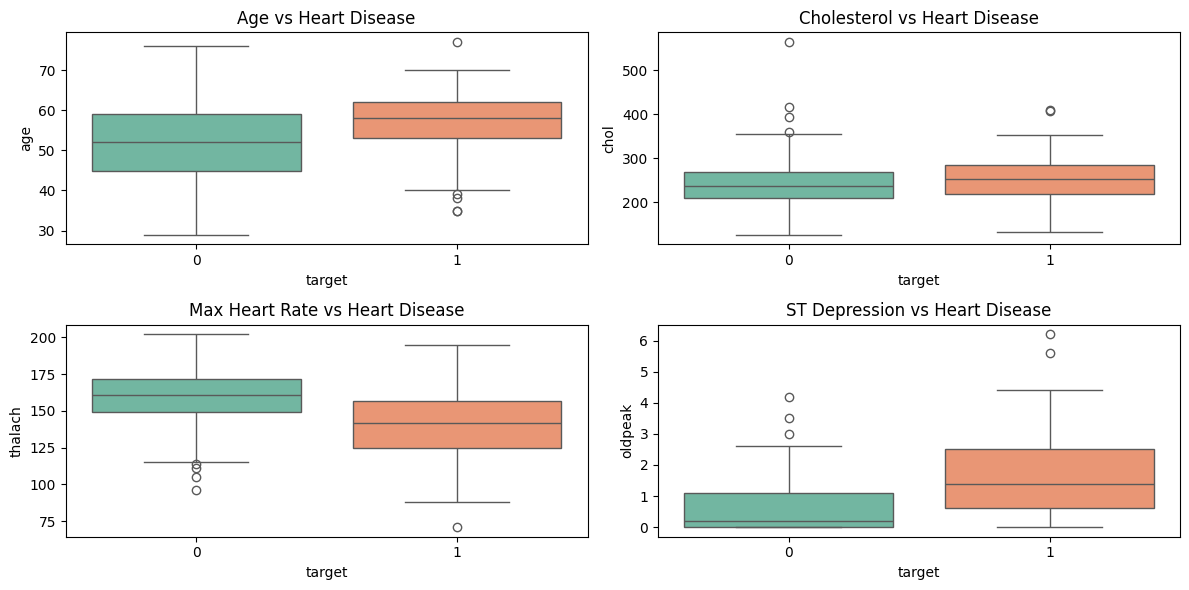

In [10]:


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Age comparison
plt.subplot(2, 2, 1)
sns.boxplot(x='target', y='age', data=df, palette='Set2')
plt.title('Age vs Heart Disease')

# Cholesterol comparison
plt.subplot(2, 2, 2)
sns.boxplot(x='target', y='chol', data=df, palette='Set2')
plt.title('Cholesterol vs Heart Disease')

# Max Heart Rate
plt.subplot(2, 2, 3)
sns.boxplot(x='target', y='thalach', data=df, palette='Set2')
plt.title('Max Heart Rate vs Heart Disease')

# ST Depression
plt.subplot(2, 2, 4)
sns.boxplot(x='target', y='oldpeak', data=df, palette='Set2')
plt.title('ST Depression vs Heart Disease')

plt.tight_layout()
plt.show()


> ###  **Group Comparison: Heart Disease vs No Disease**
>
> To better understand which factors differ between the two groups, we split the dataset by `target`:
>
> - `0` → No heart disease  
> - `1` → Heart disease present
>
> ####  Average Comparison
> The `groupby('target').mean()` summary shows:
> - Patients with **heart disease** tend to have higher `oldpeak`, `ca`, and `thal` values.
> - Patients without disease generally have higher `thalach` (maximum heart rate achieved).
>
> ####  Boxplot Insights
> - **Age:** Slightly older average age for heart disease patients.  
> - **Cholesterol:** Similar distribution in both groups, not a strong differentiator.  
> - **Max Heart Rate (`thalach`):** Significantly lower for patients with disease.  
> - **ST Depression (`oldpeak`):** Clearly higher for patients with disease.
>
> ---
>
>  **Key takeaway:**  
> `thalach`, `oldpeak`, `ca`, and `thal` continue to show the strongest visual separation between the two groups,
 confirming what the correlation analysis suggested. These features will likely carry the most predictive power in the model.


/var/folders/nm/8yyj86bj1c13_2fs_n9dql7w0000gn/T/ipykernel_9164/3218017241.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=col, data=df, palette='Set2')
/var/folders/nm/8yyj86bj1c13_2fs_n9dql7w0000gn/T/ipykernel_9164/3218017241.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=col, data=df, palette='Set2')
/var/folders/nm/8yyj86bj1c13_2fs_n9dql7w0000gn/T/ipykernel_9164/3218017241.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=col, data=df, palette='Set2')
/var/folders/nm/8yyj86bj1

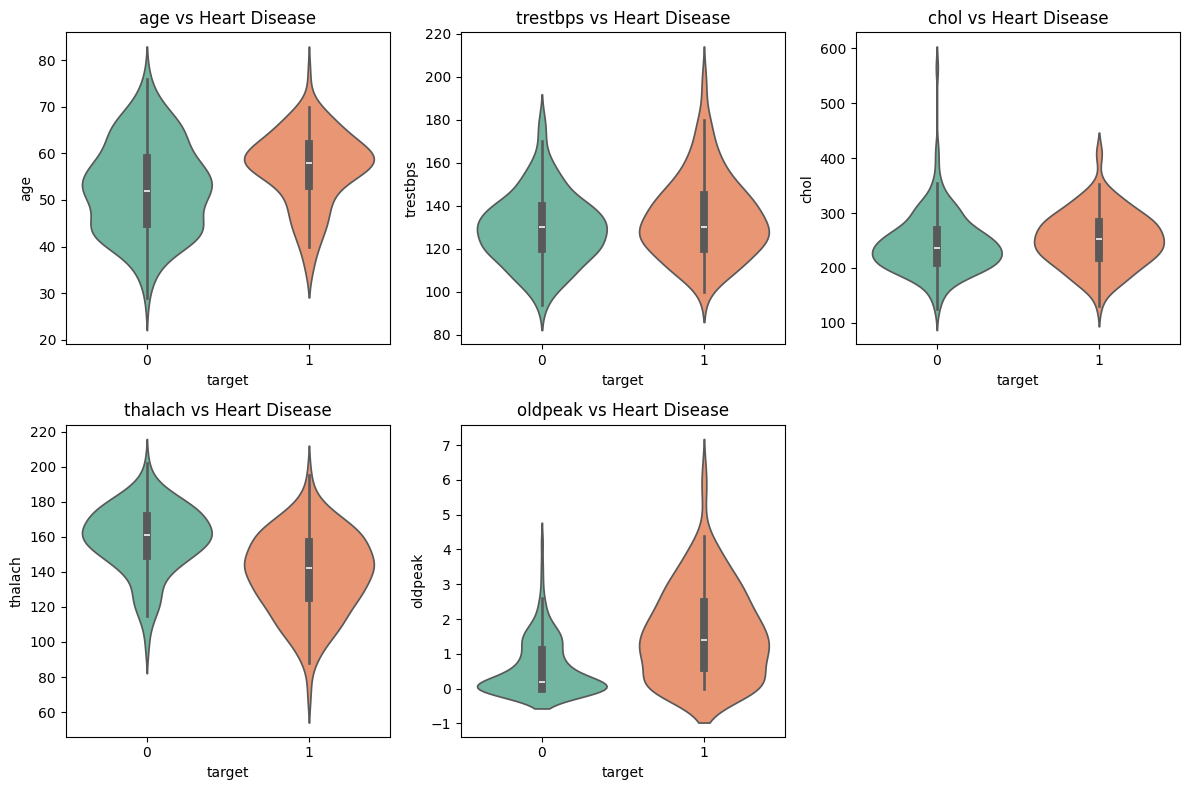

In [11]:
plt.figure(figsize=(12, 8))
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='target', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Heart Disease')

plt.tight_layout()
plt.show()


> ###  **Feature Relationship Visualization**
>
> To better visualize how key numeric features differ between patients **with** and **without heart disease**, we used pairplots and violin plots.
>
> ####  Pairplots
> - Show scatter relationships between features.
> - Clear separation observed for:
>   - `thalach` (max heart rate) — lower for diseased patients.
>   - `oldpeak` (ST depression) — higher for diseased patients.
> - Features like `chol` and `trestbps` overlap heavily → weaker indicators.
>
> ####  Violin Plots
> - Display both distribution and median differences.
> - Confirms the strongest distinctions occur in:
>   - `thalach`, `oldpeak`, and `ca`
> - Age and cholesterol differences exist but are less pronounced.
>
> ---
>
>  **Insight Summary**
> - Visual patterns consistently highlight `thalach`, `oldpeak`, `ca`, and `thal` as key predictive features.
> - These findings reinforce prior correlation and group comparison results.
> - Next step: prepare features for **scaling and model training**.


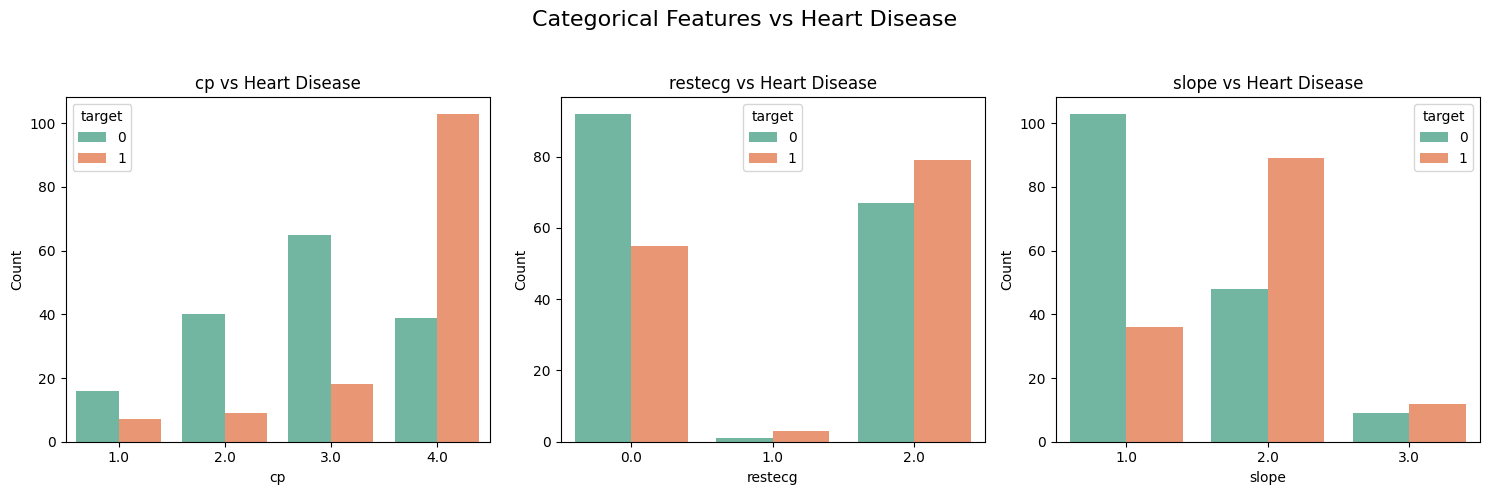

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['cp', 'restecg', 'slope']
plt.figure(figsize=(15, 5))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=feature, hue='target', data=df, palette='Set2')
    plt.title(f'{feature} vs Heart Disease')
    plt.xlabel(feature)
    plt.ylabel('Count')
    

plt.suptitle('Categorical Features vs Heart Disease', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


> ### **Categorical Feature Visualization**
>
> We examined three key categorical features to see how their distributions differ between patients **with** and **without** heart disease.
>
> #### 1 Chest Pain Type (`cp`)
> - Higher heart disease rates occur for **cp = 4 (asymptomatic)** and **cp = 3 (non-anginal pain)**.
> - Lower rates for **cp = 1–2**, suggesting typical angina patterns may not always indicate disease.
>
> #### 2 Resting ECG Results (`restecg`)
> - Most patients show **normal (0)** or **ST-T abnormality (1)** results.
> - Slightly higher disease prevalence when `restecg = 2` (definite LV hypertrophy).
>
> #### 3 Slope of ST Segment (`slope`)
> - Disease is **much more common when slope = 2 (flat)**.
> - A **downsloping (3)** ST segment is also often associated with disease, while **upsloping (1)** is usually normal.
>
> ---
>
> These visualizations reinforce that:
> - Certain chest pain and ECG characteristics are **strong predictors** of heart disease.
> - Combining categorical and numerical trends provides a fuller picture for feature importance before modeling.


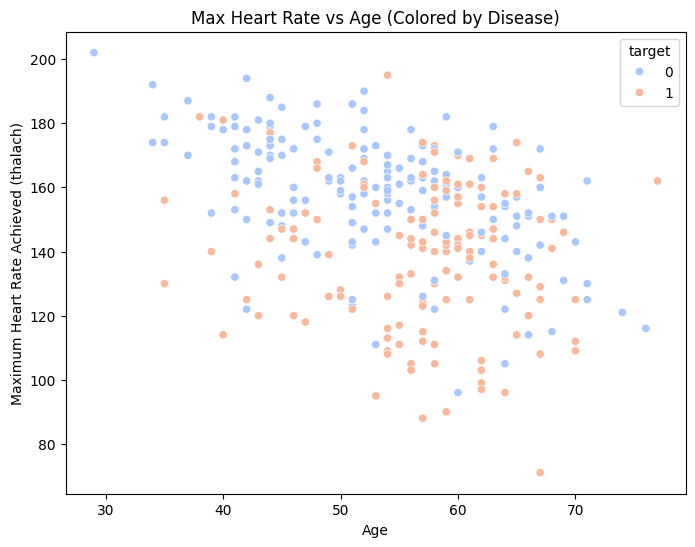

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='thalach', hue='target', data=df, palette='coolwarm')
plt.title('Max Heart Rate vs Age (Colored by Disease)')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')
plt.show()


> - The scatter plot shows that **maximum heart rate (`thalach`) generally decreases with age**, consistent with normal physiology.
> - Patients **without heart disease (target = 0)** tend to have **higher max heart rates** for a given age, while those **with heart disease (target = 1)** show lower max rates.
> - This suggests **older age and lower thalach values** often coincide with a higher chance of heart disease.
> - The color separation indicates a **clear trend**, making `age` and `thalach` potentially useful predictors for classification models.


###  Key Findings from Exploratory Data Analysis

- **Strongly Correlated Features:**  
  - Higher `thalach` (maximum heart rate) is **negatively correlated** with heart disease — patients with higher heart rate capacity tend to have no disease.  
  - Higher `oldpeak`, `ca` (number of major vessels), and abnormal `thal` values are **positively correlated** with disease presence.  
  - Chest pain type (`cp`) and ST slope (`slope`) show clear categorical separation between target groups.

- **Categorical Patterns:**  
  - Males (`sex = 1`) and patients with exercise-induced angina (`exang = 1`) are more likely to have heart disease.  
  - Chest pain type `4` (asymptomatic) is the most common among patients with disease.

- **Outliers / Anomalies:**  
  - A few extreme cholesterol (`chol`) and resting blood pressure (`trestbps`) values exist, but are within medical plausibility.  
  - Outliers in `oldpeak` (values > 5) may be considered for clipping or transformation.

- **Next Steps Before Modeling:**  
  - Scale continuous features such as `age`, `trestbps`, `chol`, `thalach`, and `oldpeak`.  
  - Encode categorical variables (`cp`, `slope`, `thal`, `restecg`, etc.) using one-hot encoding.  
  - Split data into train/test sets and proceed to model building.

